In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import requests
from io import BytesIO




In [2]:
bun_uids = pd.read_csv('./번개장터 어드민 uid 목록_20200723.csv')
bun_uids = ','.join('\''+str(i)+'\'' for i in bun_uids['uid'])

10/5 ~ 10/11 일주일간 로그인한 사람들에게  
10/5 ~ 10/7 동안 상품이 '검색결과'로 노출되는 경우  
(번장 어드민 uid 도 제외)

In [3]:
q = '''
SELECT TO_DATE(t1.event_time, 'YYYY-MM-DD') AS latest_date,
       t1.uid
FROM
  (SELECT CAST(viewer_uid AS INTEGER) AS UID,
          TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_archive.ca_event_type_item_search_log
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND viewer_uid != '-1'
     AND viewer_uid IS NOT NULL
     AND viewer_uid ~ '^[0-9]+$'
     AND length(viewer_uid) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(viewer_uid AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_db.ca_event_type_item_search_log
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND viewer_uid != '-1'
     AND viewer_uid IS NOT NULL
     AND viewer_uid ~ '^[0-9]+$'
     AND length(viewer_uid) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(viewer_uid AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_archive.ca_event_type_item_click_v5
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND viewer_uid != '-1'
     AND viewer_uid IS NOT NULL
     AND viewer_uid != ' '
     AND viewer_uid ~ '^[0-9]+$'
     AND length(viewer_uid) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(viewer_uid AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_db.ca_event_type_item_click_v5
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND viewer_uid != '-1'
     AND viewer_uid IS NOT NULL
     AND viewer_uid != ' '
     AND viewer_uid ~ '^[0-9]+$'
     AND length(viewer_uid) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_archive.ca_event_type_user_login_log
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_db.ca_event_type_user_login_log
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_archive.ca_event_type_user_join_log
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(event_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_db.ca_event_type_user_join_log
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(user_id AS INTEGER) AS UID,
                TO_DATE(server_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_db.app_event_type_view
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND user_id != '-1'
     AND user_id IS NOT NULL
     AND user_id ~ '^[0-9]+$'
     AND length(user_id) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(user_id AS INTEGER) AS UID,
                TO_DATE(server_time, 'YYYY-MM-DD') AS event_time
   FROM bun_log_db.app_event_type_search
   WHERE YEAR || MONTH || DAY BETWEEN '20201005' AND '20201011'
     AND user_id != '-1'
     AND user_id IS NOT NULL
     AND user_id ~ '^[0-9]+$'
     AND length(user_id) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(modified_at, 'YYYY-MM-DD') AS event_time
   FROM service1_quicket.product_info
   WHERE modified_at >= '2020-10-05 00:00:00'
     AND modified_at <= '2020-10-11 23:59:59'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(p.uid AS INTEGER) AS UID,
                TO_DATE(pu.modified_at, 'YYYY-MM-DD') AS event_time
   FROM service1_quicket.product_up pu
   INNER JOIN service1_quicket.product_info p ON p.id = pu.pid
   WHERE pu.modified_at >= '2020-10-05 00:00:00'
     AND pu.modified_at <= '2020-10-11 23:59:59'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(modified_at, 'YYYY-MM-DD') AS event_time
   FROM service1_quicket.user_device
   WHERE modified_at >= '2020-10-05 00:00:00'
     AND modified_at <= '2020-10-11 23:59:59'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2
   UNION SELECT CAST(UID AS INTEGER) AS UID,
                TO_DATE(access_time, 'YYYY-MM-DD') AS event_time
   FROM service1_quicket.user_last_access_time
   WHERE access_time >= '2020-10-05 00:00:00'
     AND access_time <= '2020-10-11 23:59:59'
     AND UID != '-1'
     AND UID IS NOT NULL
     AND UID ~ '^[0-9]+$'
     AND length(UID) <= 8
   GROUP BY 1, 2) t1
GROUP BY 1, 2
'''
uid_login = pd.read_sql(q, con=bun_dw)

In [3]:
# uid_login.to_csv('uid_login.csv', index=False)
uid_login = pd.read_csv('uid_login.csv')

In [5]:
uid_login.shape

(3966865, 2)

In [6]:
uid_login['uid'].nunique()

1360983

In [12]:
login_temp = uid_login.groupby('uid', as_index=False)['latest_date'].count()
everyday = login_temp[login_temp['latest_date'] == 7]

In [14]:
everyday['uid'].nunique()

79397

In [15]:
uids = ','.join('\''+str(i)+'\'' for i in everyday['uid'].unique())

In [19]:
q = f'''
SELECT i.YEAR||i.MONTH||i.DAY AS DAY,
       i.imp_id,
       i.ref_term,
       i.user_id,
       i.content_id,
       i.content_position,
       p.uid AS content_owner,
       p.category_id AS category_id,
       i.ref_source AS ad_type,
       i.ref_campaign AS ad_id
FROM bun_log_db.app_event_type_impression i
JOIN service1_quicket.product_info p ON i.content_id = p.id
WHERE p.uid IN ({uids})
  AND i.user_id NOT IN ({bun_uids})
  AND i.page_id = '검색결과'
  AND i.device_type = 'a'
  AND i.YEAR||i.MONTH||i.DAY = '20201012'
'''

imp_df = pd.read_sql(q, con=bun_dw)

In [41]:
# imp_df.to_csv('imp_df_20201012.csv', index=False)
imp_df = pd.read_csv('imp_df_2.csv')

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
imp_df.shape

(12756107, 10)

In [42]:
imp_df.head()

,day,imp_id,ref_term,user_id,content_id,content_position,content_owner,category_id,ad_type,ad_id,category,ifUp,day_diff,keyword_imp_cnt,rank,rank_reverse
0,20201012,99815f83dbe419ebc463,노스페이스 핑크,12036541,76917587,101,150222,400050510,NaN,NaN,400,False,1053,35,2427,35
1,20201012,99815f83dc0219ec6b50,노스페이스 핑크,12036541,90792853,9,2805327,310090030,NaN,NaN,310,False,733,35,2427,35
2,20201012,97165f83dbc719e4d24b,노스페이스 핑크,12036541,90792853,9,2805327,310090030,NaN,NaN,310,False,733,35,2427,35
3,20201012,99815f83dc0219ec6b51,노스페이스 핑크,12036541,94139647,10,3357019,400050500,NaN,NaN,400,False,668,35,2427,35
4,20201012,97165f83dbc719e4d24c,노스페이스 핑크,12036541,94139647,10,3357019,400050500,NaN,NaN,400,False,668,35,2427,35


In [50]:
ad = imp_df[~imp_df['ad_type'].isna()]
non_ad = imp_df[(imp_df['ad_type'].isnull()) & (imp_df['ifUp'] == False)]
up = imp_df[(imp_df['ad_type'].isnull()) & (imp_df['ifUp'] == True)]

In [54]:
ad['content_owner'] = ad['content_owner'].astype(str)
non_ad['content_owner'] = non_ad['content_owner'].astype(str)
up['content_owner'] = up['content_owner'].astype(str)

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [55]:
ad['content_id'] = ad['content_id'].astype(str)
non_ad['content_id'] = non_ad['content_id'].astype(str)
up['content_id'] = up['content_id'].astype(str)

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [56]:
ad_pid_cnt = ad.groupby('content_owner')['content_id'].nunique().reset_index()
non_ad_pid_cnt = non_ad.groupby('content_owner')['content_id'].nunique().reset_index()
up_pid_cnt = up.groupby('content_owner')['content_id'].nunique().reset_index()

In [57]:
ad_pid_cnt.columns = ['content_owner', 'content_cnt']
non_ad_pid_cnt.columns = ['content_owner', 'content_cnt']
up_pid_cnt.columns = ['content_owner', 'content_cnt']

In [77]:
ad_pid_cnt['content_cnt'].describe()

count    952.000000
mean      10.920168
std       22.160915
min        1.000000
25%        2.000000
50%        3.000000
75%       10.000000
max      123.000000
Name: content_cnt, dtype: float64

In [80]:
temp_ad = ad.groupby('content_owner')['imp_id'].size().reset_index()
temp_ad.columns = ['content_owner', 'imp_cnt']
temp_ad['imp_cnt'] = temp_ad['imp_cnt'] * 1.8
temp_ad.describe()

,imp_cnt
count,952.000000
mean,2680.292647
std,5870.195709
min,1.800000
25%,411.300000
50%,993.600000
75%,2551.500000
max,88158.600000


In [59]:
ad_hist = pd.merge(temp_ad, ad_pid_cnt, on = 'content_owner')
ad_hist.columns = ['content_owner', 'imp_cnt', 'content_cnt']

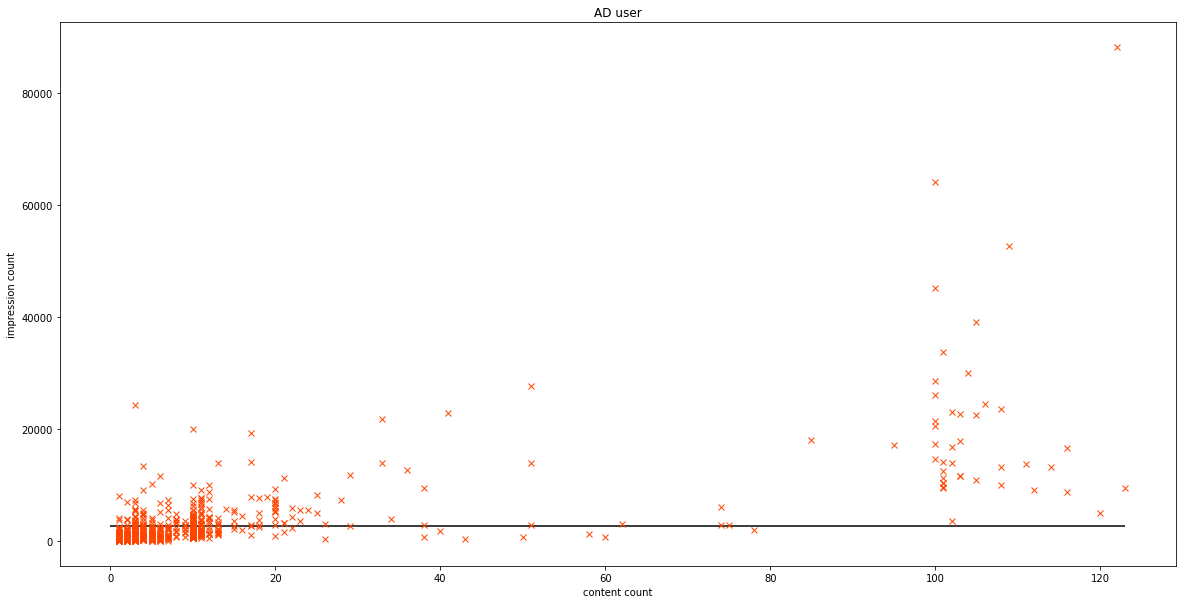

In [60]:
plt.figure(figsize=(20, 10))
plt.plot(ad_hist['content_cnt'], ad_hist['imp_cnt'], 'x', color = 'orangered', linewidth=2)
plt.xlabel('content count')
plt.ylabel('impression count')
plt.title('AD user')
plt.hlines(2681.487605, 0, 123)

In [71]:
c = ad_hist[(ad_hist['imp_cnt'] < 2000) & (ad_hist['content_cnt'] >= 40)]['content_owner'].unique()

In [74]:
ad[ad['content_owner'].isin(c)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
2,400,138
1,320,95
0,310,55
3,600,40
4,900,1


In [75]:
c = ad_hist[(ad_hist['imp_cnt'] >= 2000)]['content_owner'].unique()

In [76]:
ad[ad['content_owner'].isin(c)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
4,400,2766
7,600,1752
3,320,1232
9,750,793
2,310,238
10,800,214
8,700,209
11,900,161
6,500,33
5,410,32


In [72]:
ad.head()

,day,imp_id,ref_term,user_id,content_id,content_position,content_owner,category_id,ad_type,ad_id,category,ifUp,day_diff,keyword_imp_cnt,rank,rank_reverse
226,20201012,99815f83e1ae1a0ba2fc,핑크패딩,7173049,132815182,0,6934600,310090030,ad_super_up_shop,127428,310,False,34,142,2320,142
227,20201012,979d5f8467e901b45a0c,핑크패딩,6243231,132815182,0,6934600,310090030,ad_super_up_shop,127428,310,False,34,142,2320,142
323,20201012,99815f83d68419cebcae,패딩,10433764,134639017,108,11734478,320080999,ad_super_up,1.55977e+06,320,False,9,21702,19,2443
324,20201012,99505f83ec491a4f9646,패딩,11802413,134639017,397,11734478,320080999,ad_super_up,1.55977e+06,320,False,9,21702,19,2443
325,20201012,99985f83eb951a3238e0,패딩,6337631,134639017,437,11734478,320080999,ad_super_up,1.55977e+06,320,False,9,21702,19,2443


In [61]:
up_pid_cnt.describe()

,content_cnt
count,17746.000000
mean,5.113040
std,4.709141
min,1.000000
25%,1.000000
50%,4.000000
75%,8.000000
max,92.000000


In [62]:
temp_up = up.groupby('content_owner', as_index=False)['imp_id'].count()
temp_up.columns = ['content_owner', 'imp_cnt']
temp_up['imp_cnt'] = temp_up['imp_cnt'] * 1.8
temp_up.describe()

,imp_cnt
count,17746.000000
mean,333.511112
std,505.088444
min,1.800000
25%,81.000000
50%,196.200000
75%,412.200000
max,21643.200000


Text(0.5, 1.0, 'UP user')

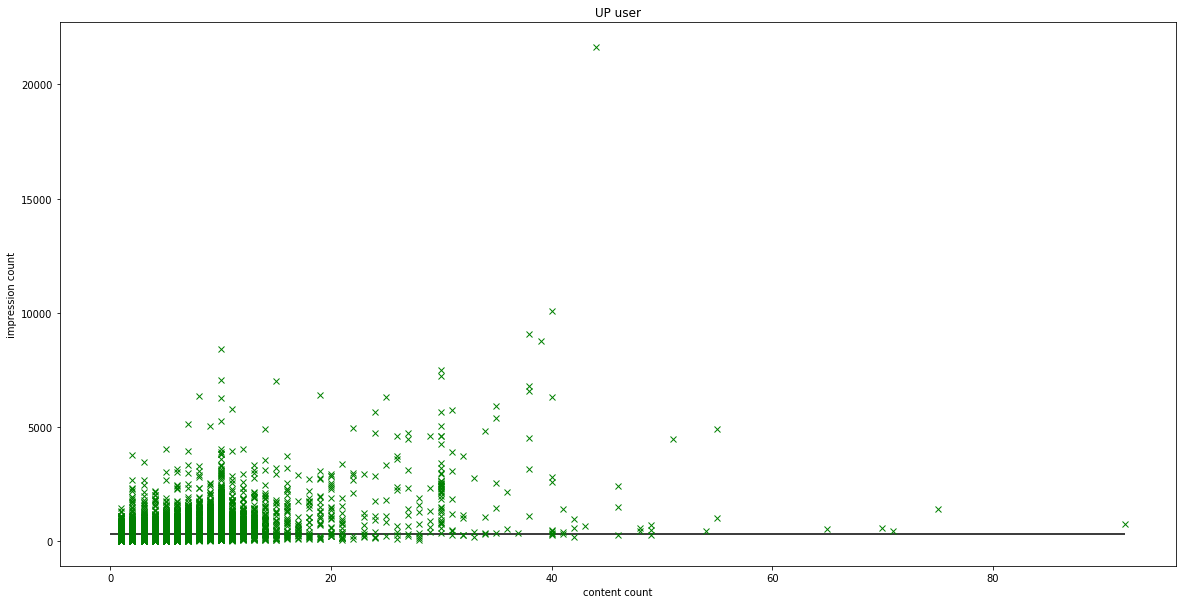

In [64]:
up_hist = pd.merge(temp_up, up_pid_cnt, on = 'content_owner')
up_hist.columns = ['content_owner', 'imp_cnt', 'content_cnt']

plt.figure(figsize=(20, 10))
plt.plot(up_hist['content_cnt'], up_hist['imp_cnt'], 'x', color = 'green', linewidth=2)
plt.hlines(333.511112, 0, 92)
plt.xlabel('content count')
plt.ylabel('impression count')
plt.title('UP user')

In [65]:
non_ad_pid_cnt.describe()

,content_cnt
count,46756.000000
mean,18.093699
std,80.405875
min,1.000000
25%,2.000000
50%,4.000000
75%,11.000000
max,4902.000000


In [66]:
temp_non_ad = non_ad.groupby('content_owner', as_index=False)['imp_id'].count()
temp_non_ad.columns = ['content_owner', 'imp_cnt']
temp_non_ad['imp_cnt'] = temp_non_ad['imp_cnt'] * 1.8
temp_non_ad.describe()

,imp_cnt
count,46756.000000
mean,309.793952
std,979.956238
min,0.000000
25%,23.400000
50%,86.400000
75%,284.400000
max,55728.000000


Text(0.5, 1.0, 'Normal user')

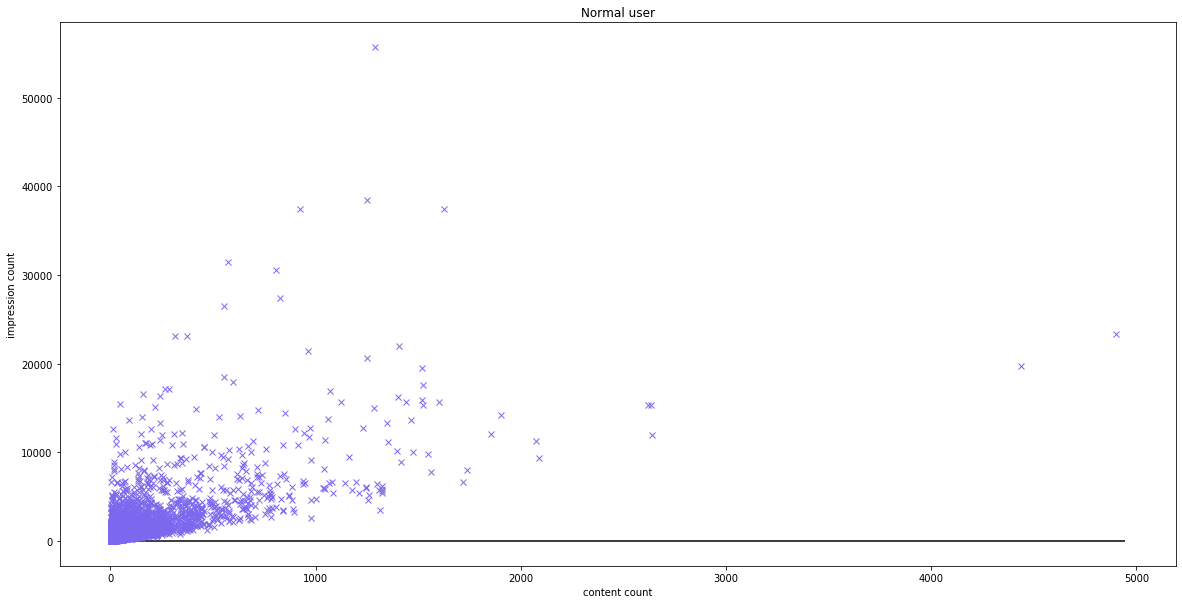

In [67]:
non_ad_hist = pd.merge(temp_non_ad, non_ad_pid_cnt, on = 'content_owner')
non_ad_hist.columns = ['content_owner', 'imp_cnt', 'content_cnt']

plt.figure(figsize=(20, 10))
plt.plot(non_ad_hist['content_cnt'], non_ad_hist['imp_cnt'], 'x', color = 'mediumslateblue', linewidth=2)
plt.hlines(18.389168, 0, 4944)
plt.xlabel('content count')
plt.ylabel('impression count')
plt.title('Normal user')

Text(0.5, 1.0, 'Impression Count By Shop')

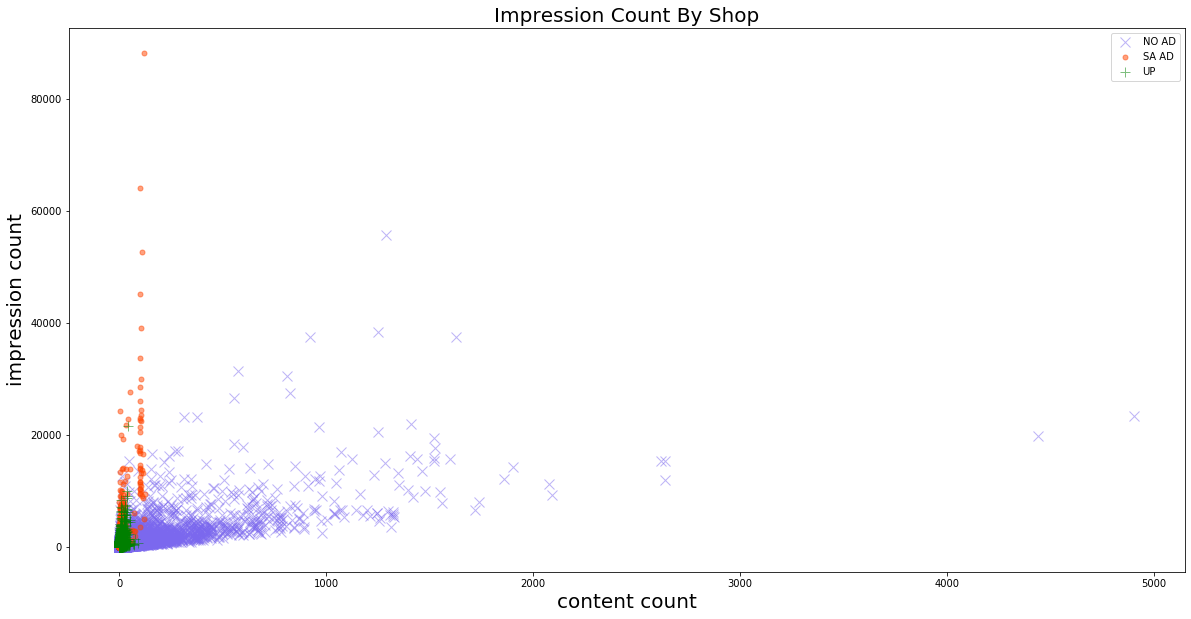

In [69]:
plt.figure(figsize=(20, 10))
plt.plot(non_ad_hist['content_cnt'], non_ad_hist['imp_cnt'], 'x', color = 'mediumslateblue', alpha=0.5, markersize=10, label='NO AD')
plt.plot(ad_hist['content_cnt'], ad_hist['imp_cnt'], '.', color = 'orangered', alpha=0.5, markersize=10, label='SA AD')
plt.plot(up_hist['content_cnt'], up_hist['imp_cnt'], '+', color = 'green', alpha=0.5, markersize=10, label='UP')

plt.legend()

plt.xlabel('content count', fontsize=20)
plt.ylabel('impression count', fontsize=20)
plt.title('Impression Count By Shop', fontsize=20)

In [18]:
non_ad_pid_cnt.sort_values('content_cnt', ascending=False)

,content_owner,content_cnt
13315,1693279,4944
3470,11085915,4479
50824,995428,2660
50625,988555,2654
24618,4124878,2638
23564,3925374,2118
21975,3629050,2076
42834,7626167,1904
33278,5674991,1898
25323,4259246,1737


In [79]:
ad_uids = ad['content_owner'].unique()

In [82]:
ad_users = imp_df[imp_df['content_owner'].isin(ad_uids)].groupby('content_owner')['content_id'].nunique().reset_index()
ad_users.columns = ['content_owner', 'content_cnt']
ad_user_imp = imp_df[imp_df['content_owner'].isin(ad_uids)].groupby('content_owner')['imp_id'].size().reset_index()
ad_user_imp.columns = ['content_owner', 'imp_cnt']
ad_user_imp = pd.merge(ad_users, ad_user_imp, on='content_owner')

Text(0.5, 1.0, 'Shops who have at least one product exposed using SA AD')

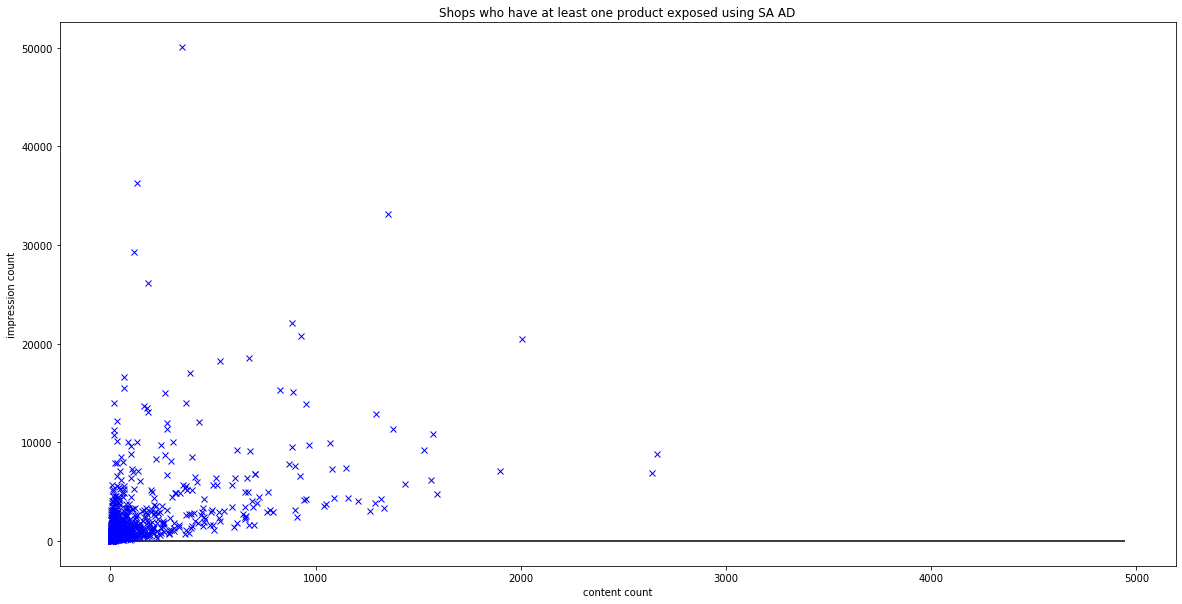

In [99]:
plt.figure(figsize=(20, 10))
plt.plot(ad_user_imp['content_cnt'], ad_user_imp['imp_cnt'], 'x', color = 'blue', linewidth=2)
plt.hlines(18.389168, 0, 4944)
plt.xlabel('content count')
plt.ylabel('impression count')
plt.title('Shops who have at least one product exposed using SA AD')

In [85]:
imp_df.head()

,day,imp_id,ref_term,user_id,content_id,content_position,content_owner,category_id,ad_type,ad_id,category,ifUp,day_diff,keyword_imp_cnt,rank,rank_reverse
0,20201012,99815f83dbe419ebc463,노스페이스 핑크,12036541,76917587,101,150222,400050510,NaN,NaN,400,False,1053,35,2427,35
1,20201012,99815f83dc0219ec6b50,노스페이스 핑크,12036541,90792853,9,2805327,310090030,NaN,NaN,310,False,733,35,2427,35
2,20201012,97165f83dbc719e4d24b,노스페이스 핑크,12036541,90792853,9,2805327,310090030,NaN,NaN,310,False,733,35,2427,35
3,20201012,99815f83dc0219ec6b51,노스페이스 핑크,12036541,94139647,10,3357019,400050500,NaN,NaN,400,False,668,35,2427,35
4,20201012,97165f83dbc719e4d24c,노스페이스 핑크,12036541,94139647,10,3357019,400050500,NaN,NaN,400,False,668,35,2427,35


In [87]:
pids = ','.join('\''+str(i)+'\'' for i in imp_df['content_id'].unique())
q = f'''
SELECT pid AS content_id, pfavcnt
FROM service1_quicket.product_ext
WHERE pid IN ({pids})
'''
p = pd.read_sql(q, con=bun_dw)

In [89]:
p['content_id'] = p['content_id'].astype(str)

In [91]:
imp_df['content_id'] = imp_df['content_id'].astype(str)
imp_df = pd.merge(imp_df, p, how='left', on='content_id')

In [93]:
imp_df.head()

,day,imp_id,ref_term,user_id,content_id,content_position,content_owner,category_id,ad_type,ad_id,category,ifUp,day_diff,keyword_imp_cnt,rank,rank_reverse,pfavcnt
0,20201012,99815f83dbe419ebc463,노스페이스 핑크,12036541,76917587,101,150222,400050510,NaN,NaN,400,False,1053,35,2427,35,2
1,20201012,99815f83dc0219ec6b50,노스페이스 핑크,12036541,90792853,9,2805327,310090030,NaN,NaN,310,False,733,35,2427,35,4
2,20201012,97165f83dbc719e4d24b,노스페이스 핑크,12036541,90792853,9,2805327,310090030,NaN,NaN,310,False,733,35,2427,35,4
3,20201012,99815f83dc0219ec6b51,노스페이스 핑크,12036541,94139647,10,3357019,400050500,NaN,NaN,400,False,668,35,2427,35,7
4,20201012,97165f83dbc719e4d24c,노스페이스 핑크,12036541,94139647,10,3357019,400050500,NaN,NaN,400,False,668,35,2427,35,7


In [94]:
imp_df.to_csv('imp_df_2.csv', index=False)